## Sentiment Analysis & Topic Detection for global Newspaper Articles

This is the final workbook, which ties everything of the project together. At first the data preprocessing pipeline is called for three selected words. [Trump, Brexit, Syria]. All Articles containing these words are selected.

Afterwards the models are applied: The Sentiment analysis finding out the tendencies of each newspaper article and the LDA to detect the topics. The LDA analysis to find out the exact amount of topics was carried out in separate workbooks.

In the bottom part of the notebook a visualization tool is presented, that shows the findings of each model and allows the analysis of the findings.

In [1]:
## Library Imports
import text_transformer as tt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from ipywidgets import widgets
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
from lda_utils import *


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Preprocessing Pipelines and filtering Articles

In [2]:
## The preprocessing pipeline for the filter_word "Trump"
remove_tokens = ["’", "‘", "would", "said", "also", "“", "”", "–"]
filter_words = ["Trump"]
%time articles_t, tokenized_t = tt.preprocessing(directory="articles", verbose= True, remove_words=remove_tokens, filter_words=filter_words)
trump_df = pd.DataFrame.from_dict(articles_t)

We're at 0.0% of the data.
We're at 1.22% of the data.
We're at 2.43% of the data.
We're at 3.65% of the data.
We're at 4.86% of the data.
We're at 6.08% of the data.
We're at 7.29% of the data.
We're at 8.51% of the data.
We're at 9.72% of the data.
We're at 10.94% of the data.
We're at 12.15% of the data.
We're at 13.37% of the data.
We're at 14.58% of the data.
We're at 15.8% of the data.
We're at 17.01% of the data.
We're at 18.23% of the data.
We're at 19.44% of the data.
We're at 20.66% of the data.
We're at 21.87% of the data.
We're at 23.09% of the data.
We're at 24.3% of the data.
We're at 25.52% of the data.
We're at 26.73% of the data.
We're at 27.95% of the data.
We're at 29.16% of the data.
We're at 30.38% of the data.
We're at 31.59% of the data.
We're at 32.81% of the data.
We're at 34.02% of the data.
We're at 35.24% of the data.
We're at 36.45% of the data.
We're at 37.67% of the data.
We're at 38.88% of the data.
We're at 40.1% of the data.
We're at 41.31% of the data

In [3]:
## The preprocessing pipeline for the filter_word "Brexit"
remove_tokens = ["’", "‘", "would", "said", "also", "“", "”", "–"]
filter_words = ["Brexit"]
%time articles_b, tokenized_b = tt.preprocessing(directory="articles", verbose= False, remove_words=remove_tokens, filter_words=filter_words)
brexit_df = pd.DataFrame.from_dict(articles_b)

CPU times: user 6min 4s, sys: 1min 21s, total: 7min 25s
Wall time: 7min 44s


In [4]:
## The preprocessing pipeline for the filter_word "Syria"
remove_tokens = ["’", "‘", "would", "said", "also", "“", "”", "–"]
filter_words = ["Syria"]
%time articles_s, tokenized_s = tt.preprocessing(directory="articles", verbose= False, remove_words=remove_tokens, filter_words=filter_words)
syria_df = pd.DataFrame.from_dict(articles_s)

CPU times: user 2min 6s, sys: 30.3 s, total: 2min 36s
Wall time: 2min 54s


### Applied Models (Sentiment Analysis & LDA)

In [5]:
# returns the topic with the highest probability
def get_topic_doc(lda_model, corpus, idx):
    temp_list = lda_model[corpus[idx]].copy() # this copy is essential as the model computes the probs with slight diffs
    prob_list = [i[1] for i in temp_list] # construct a flattened list with all probs
    
    return temp_list[np.argmax(prob_list)][0] #take the highest probability and return the topic

In [6]:
# LDA for "Trump"
dictionary_LDA_t = dictionary_LDA(tokenized_t) # create an LDA Dictionary
corpus_t = corpus(dictionary_LDA_t, tokenized_t) # create the corpus

# intitializing a LDA model with 14 topics using the 0.01 as eta and alpha -> refer to the respective notebook
lda_model_trump = LDA_model(corpus_t, 14, dictionary_LDA_t)

In [7]:
# adding each topic and the filter_word to the df
trump_df["topic"] = [get_topic_doc(lda_model_trump, corpus_t, row) for row in range(trump_df.shape[0])]
trump_df["filter_word"] = "trump"

In [8]:
# LDA for "Syria"
dictionary_LDA_s = dictionary_LDA(tokenized_s) 
corpus_s = corpus(dictionary_LDA_s, tokenized_s) 

# intitializing a LDA model with 6 topics using 0.8 as eta and 0.11 as alpha -> refer to the respective notebook
lda_model_syria = LDA_model(corpus_s, 6, dictionary_LDA_s, eta=0.8, alpha=0.11)

In [9]:
# adding each topic and the filter_word to the df
syria_df["topic"] = [get_topic_doc(lda_model_syria, corpus_s, row) for row in range(syria_df.shape[0])]
syria_df["filter_word"] = "syria"

In [10]:
# LDA for "Brexit"
dictionary_LDA_b = dictionary_LDA(tokenized_b) 
corpus_b = corpus(dictionary_LDA_b, tokenized_b) 

# intitializing a LDA model with 7 topics using the standard values for eta and alpha -> refer to the respective notebook
lda_model_brexit = LDA_model(corpus_b, 7, dictionary_LDA_b, eta=0.01, alpha=0.01)

In [11]:
# adding each topic and the filter_word to the df
brexit_df["topic"] = [get_topic_doc(lda_model_brexit, corpus_b, row) for row in range(brexit_df.shape[0])]
brexit_df["filter_word"] = "brexit"

In [12]:
# merge the dataframes
frames = [trump_df, syria_df, brexit_df]
articles_df = pd.concat(frames)
articles_df = articles_df.reset_index()
articles_df["topic_label"] = articles_df["filter_word"] + "_" + articles_df["topic"].map(str) # get a combined label

In [13]:
# apply sentiment analysis
sia = SentimentIntensityAnalyzer()
articles_df = articles_df.merge(
    articles_df.text.apply(lambda article: pd.Series(sia.polarity_scores(article))
    ), left_index=True, right_index=True)

In [14]:
# get all unique values for that column to pass as options to the viz
topics = articles_df.topic_label.unique()
filter_words = ["Brexit", "Trump", "Syria"]

In [15]:
articles_df.head()

,index,author,newspaper,text,title,url,topic,filter_word,topic_label,neg,neu,pos,compound
0,0,[Abigail Williams],nbcnews,Breaking News Emails Get breaking news alerts ...,U.S. bans 16 Saudi individuals from U.S. for r...,https://www.nbcnews.com/news/world/u-s-bans-16...,3,trump,trump_3,0.141,0.794,0.065,-0.9935
1,1,[],yahoo,Optimism that China and the United States will...,Stock markets tread water as investors eye US-...,https://finance.yahoo.com/news/asia-markets-ra...,13,trump,trump_13,0.066,0.828,0.106,0.9679
2,2,[Reuters Editorial],reuters,Trump's Fed picks draw political fire as they ...,"Business & Financial News, U.S & International...",http://newslink.reuters.com/article/us-india-e...,7,trump,trump_7,0.125,0.875,0.000,-0.7650
3,3,[],breitbart,WASHINGTON (AP) — Democrats intensified their ...,"Dems mock ‘scaredy-cat’ GOP, demand Mueller’s ...",https://www.breitbart.com/news/dems-mock-scare...,2,trump,trump_2,0.062,0.865,0.074,0.9138
4,4,[],nbcnews,Breaking News Emails Get breaking news alerts ...,"Federal judge overrules Trump order, restores ...",https://www.nbcnews.com/news/us-news/federal-j...,7,trump,trump_7,0.015,0.890,0.095,0.9844


### Color palette for the selected newspapers

In [16]:
colors = {
    'dailymail': "#004db3",
    'thetimes': '#333333',
    'theguardian': '#052962',
    'reuters': '#ff8000',
    'ft': '#fff1e5',
    'euronews':'#003865',
    'yahoo': '#400090',
    'wsj': '#333333',
    'breitbart': '#ff550f',
    'foxnews': '#c20017',
    'aljazeera': '#fa9000',
    'nytimes': '#333333',
    'cbc': '#e60505',
    'nbcnews': '#102039',
    'latimes': '#333333',
    'go': '#ffffff',
    'huffpost': '#0DBE98'
}

__Get topics to be displayed__

In [17]:
x = lda_model_trump.show_topics(num_topics=14, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]
#Below Code Prints Only Words 
for topic,words in topics_words:
    print(" ".join(words))

people one government new women like climate help us change
trump court health care democrats republicans senate law president house
trump mueller report barr president investigation counsel special campaign russia
iran trump sanctions us nuclear administration president state saudi military
trump security house nato white president officials defense north kushner
trump democratic president campaign venezuela presidential sanders percent 2020 maduro
trump — one news people media like facebook think new
trump fed federal president rate year economy growth percent bank
israel netanyahu israeli trump gaza minister president golan prime syria
china trade trump chinese united states foreign state beijing last
border trump president mexico immigration returns house tax north administration
smollett police trump case chicago two state — news fox
trump president biden — women former white news like joe
percent oil trade week global market european since brexit per


In [18]:
topics_dict = {"":""}

x = lda_model_trump.show_topics(num_topics=14, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]
#Below Code Prints Only Words 
for index, (topic,words) in enumerate(topics_words):
    topics_dict["trump_"+str(index)] = " ".join(words)

x = lda_model_syria.show_topics(num_topics=6, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]
#Below Code Prints Only Words 
for index, (topic,words) in enumerate(topics_words):
    topics_dict["syria_"+str(index)] = " ".join(words)
  
x = lda_model_brexit.show_topics(num_topics=7, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]
#Below Code Prints Only Words 
for index, (topic,words) in enumerate(topics_words):
    topics_dict["brexit_"+str(index)] = " ".join(words)

topics_dict

{'': '',
 'trump_0': 'people one government new women like climate help us change',
 'trump_1': 'trump court health care democrats republicans senate law president house',
 'trump_2': 'trump mueller report barr president investigation counsel special campaign russia',
 'trump_3': 'iran trump sanctions us nuclear administration president state saudi military',
 'trump_4': 'trump security house nato white president officials defense north kushner',
 'trump_5': 'trump democratic president campaign venezuela presidential sanders percent 2020 maduro',
 'trump_6': 'trump — one news people media like facebook think new',
 'trump_7': 'trump fed federal president rate year economy growth percent bank',
 'trump_8': 'israel netanyahu israeli trump gaza minister president golan prime syria',
 'trump_9': 'china trade trump chinese united states foreign state beijing last',
 'trump_10': 'border trump president mexico immigration returns house tax north administration',
 'trump_11': 'smollett police 

In [19]:
%matplotlib notebook

# Axis to be ploted, possible options neg, pos, neu and compound
y_axis="pos"
x_axis="neg"

#https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib
# Ploting a regression line in matplotlib is strangly hard
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    ax = plt.gca()
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color=colors[drop_newspapers.value])

def action(words):
    plt.cla()
    ax=plt.gca()
    ax.set_xlim([-0.025,0.4])
    ax.set_ylim([-0.025,0.4])
    plot_alpha = 0.2
    selected_plot_alpha = 0.8
    centroid_alpha = 0.85
    selected_centroid_alpha = 1

    # Slice the dataframe based on the word and the topic
    if drop_topics.value == "":
        df = articles_df[articles_df.text.str.contains(drop_words.value)] 
    else:
        df = articles_df[articles_df.text.str.contains(drop_words.value)]
        df = df[df["topic_label"] == drop_topics.value]
        

    #Plot the centroids for all newspapers and lower transparency in the scatter
    if centroid.value:
        plot_alpha = 0.025
        selected_plot_alpha = 0.15

    #Plot pre computed regression for selected newspaper
    if regression.value and drop_newspapers.value != "" :
        reg = LinearRegression()
        reg_articles = df[df.newspaper.isin([drop_newspapers.value])]
        if reg_articles.shape[0] > 0:
            reg.fit(reg_articles[x_axis].values.reshape(-1, 1) , reg_articles[y_axis])
            abline(reg.coef_, reg.intercept_)

    #Plot the scatter plot
    sns.scatterplot(data=df[~df.newspaper.isin([drop_newspapers.value])],
                    y=y_axis, x=x_axis, hue="newspaper", label="Other newspapers", 
                    s=100, alpha=plot_alpha, palette=colors , ax=ax)
    sns.scatterplot(data=df[df.newspaper.isin([drop_newspapers.value])], 
                    y=y_axis, x=x_axis, hue="newspaper", label="Selected Newspaper" ,
                    s=100,alpha=selected_plot_alpha, palette=colors , ax=ax)
    if centroid.value:
        centers = df.groupby("newspaper").mean().reset_index()
        sns.scatterplot(data=centers[~centers.newspaper.isin([drop_newspapers.value])],
                        y=y_axis, x=x_axis, hue="newspaper", label="Other newspapers", 
                        s=200, alpha=centroid_alpha, palette=colors , ax=ax)
        sns.scatterplot(data=centers[centers.newspaper.isin([drop_newspapers.value])], 
                        y=y_axis, x=x_axis, hue="newspaper", label="Selected Newspaper" 
                        ,alpha=selected_centroid_alpha, s=200, palette=colors , ax=ax)
    if len(df) != 0:
        topic_bar.value = str(int(df.text.str.len().mean())) 
        if drop_newspapers.value != '':
            newspaper_bar.value = articles_df[articles_df.newspaper.isin([drop_newspapers.value])].text.str.len().mean()
            topic_newspaper_bar.value = df[df.newspaper.isin([drop_newspapers.value])].text.str.len().mean()
    textArea.value = "Showing data for newspaper: " + drop_newspapers.value + "\nRelating: "+ drop_words.value+'\n'
    textArea.value += "Topic: " + topics_dict[drop_topics.value]

## UI components

In [20]:
##### Ipython UI components
drop_words = widgets.Dropdown(
    options=np.append(filter_words, [""]),
    description='Word:',
    value="",
    layout=widgets.Layout(width='40%')
)
drop_topics = widgets.Dropdown(
    options=np.append(topics, [""]),
    description='Topics:',
    value="",
    layout=widgets.Layout(width='40%')
)

info_label = widgets.Label(
    value="Average length of the article per:"
)

topic_bar = widgets.FloatProgress(
    value=0,
    min=0,
    max=articles_df.text.str.len().quantile(0.9),
    step=1,
    description='Topic:',
    bar_style='info', 
    orientation='horizontal',
    layout=widgets.Layout(width='95%')
)
newspaper_bar = widgets.FloatProgress(
    value=0,
    min=0,
    max=articles_df.text.str.len().quantile(0.9),
    step=1,
    description='Newspaper:',
    bar_style='success', 
    orientation='horizontal',
    layout=widgets.Layout(width='95%')
)
topic_newspaper_bar = widgets.FloatProgress(
    value=0,
    min=0,
    max=articles_df.text.str.len().quantile(0.9),
    step=1,
    description='Paper Topic:',
    bar_style='warning', 
    orientation='horizontal',
    layout=widgets.Layout(width='95%')
)
textArea = widgets.Textarea(
    value='',
    layout=widgets.Layout(width='40%', height='120px'),
    description = "Other Info:",
    disabled=True,
)
drop_newspapers = widgets.Dropdown(
    options=np.append(articles_df.newspaper.unique(), [""]),
    description='Newspaper:',
    value="",
    layout=widgets.Layout(width='40%')
)
regression = widgets.Checkbox(False, description='Regression')
centroid = widgets.Checkbox(False, description='Centroid')



# Add actions to Ipython components
regression.observe(action)
centroid.observe(action)
drop_newspapers.observe(action)
drop_words.observe(action)
drop_topics.observe(action)


# Display them after the plot
items_lda = widgets.Box([item for item in [drop_words, drop_topics]])
bars = widgets.VBox([item for item in [info_label, topic_bar, newspaper_bar, topic_newspaper_bar]],layout=widgets.Layout(width='42.5%'))
info_area = widgets.HBox([item for item in [bars, textArea]])
# Display them after the plot
items_sentiment = widgets.Box([item for item in [drop_newspapers, regression, centroid]])


/opt/conda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  silent = bool(old_value == new_value)


## Render the whole thing

Box(children=(Dropdown(description='Word:', index=3, layout=Layout(width='40%'), options=('Brexit', 'Trump', '…

Box(children=(Dropdown(description='Newspaper:', index=17, layout=Layout(width='40%'), options=('nbcnews', 'ya…

<IPython.core.display.Javascript object>


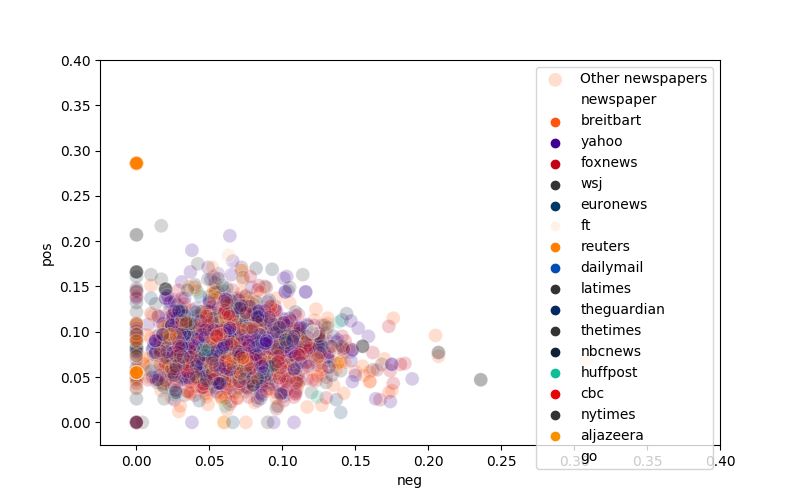

In [21]:
# Display the widgets
display(items_lda)
display(info_area)
display(items_sentiment)
#Plot size
plt.figure("Pos/Neg Plot",figsize=(8,5),edgecolor="b",facecolor="b",frameon=False)
# Plot the inital plot
action(drop_newspapers.value)